# Making a lat-lon reference plot
### Scott Wales, CLEX CMS

I've been helping out a few people with plots recently. I find setting plot limits to be a bit of a pain - I only do it occasionally, and generally if I want just a plot of Australia I'll make a guess at the bounds, plot the coastlines and refine from there.

It would be handy for me to have a reference plot that I can easily look at to set bounds, so let's make one with Cartopy!

I'm using our Anaconda environment on NCI's [VDI virtual desktop](https://opus.nci.org.au/display/Help/VDI+User+Guide), which you can load by running

    module use /g/data3/hh5/public/modules
    module load conda/analysis3
    jupyter notebook
    
To start out with I'll load the libraries I need - today just pyplot and cartopy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Cartopy allows you to work with different map projections. You create a cartopy axis by adding a projection to a normal pyplot axis. Cartopy axes have a few special features, for instance you can easily add coastlines and background images.

I want to read off lat and lon coordinates, so I'll use the Plate Carree projection - a regular lat-lon grid

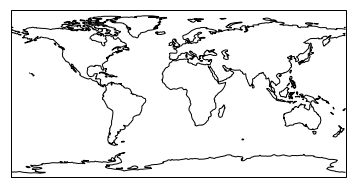

In [103]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

Since I'm mainly interested in Australia let's put that in the centre of the plot, which can be easily done with an argument to the projection.

Let's also add some grid lines so that I can read co-ordinates. Remember `range()` produces a half-open interval, so I've increased the upper limit by a degree to get the top grid line

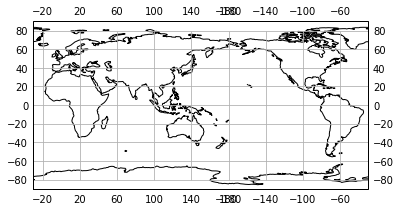

In [90]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.set_global()
ax.coastlines()
ax.gridlines(xlocs=range(-180,181,40), ylocs=range(-80,81,20),draw_labels=True)

The labels are a bit of a mess at around longitude 180 - looks like it's added a label for both -180 and 180. This isn't a big deal, just means we have to create the grid lines and the labels in two calls instead of one.

Let's also add the tropics just as an exercise in making different line styles

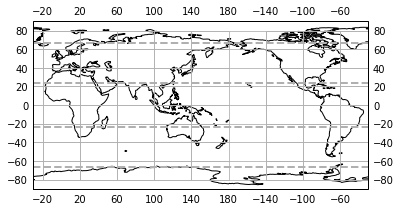

In [102]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.set_global()
ax.coastlines()
ax.gridlines(xlocs=range(-180,181,40), ylocs=range(-80,81,20),draw_labels=False)
ax.gridlines(xlocs=range(-140,181,40), ylocs=range(-80,81,20),draw_labels=True)

tropics = ax.gridlines(ylocs=[-66.5,-23.43691,23.43691,66.5],draw_labels=False,
                       linewidth=2, linestyle='--', edgecolor='dimgrey')
tropics.xlines=False

Doesn't look too bad. Before we print it out let's bump up the figure size and use some higher resolution coastlines.

Funnily enough Cartopy doesn't let us add labels to the axes, but we can use Pyplot's `text()` function manually

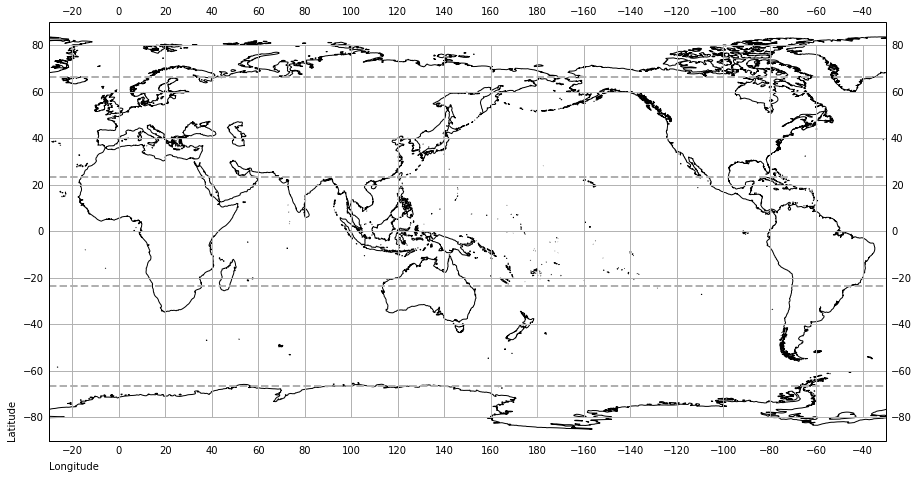

In [79]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.set_global()
ax.coastlines(resolution='50m')
ax.gridlines(xlocs=range(-180,181,20), ylocs=range(-80,81,20),draw_labels=False)
ax.gridlines(xlocs=range(-160,181,20), ylocs=range(-80,81,20),draw_labels=True)
tropics = ax.gridlines(ylocs=[-66.5,-23.43691,23.43691,66.5],draw_labels=False,linewidth=2,linestyle='--', edgecolor='dimgrey')
tropics.xlines=False

ax.text(0,-0.07,'Longitude', transform=ax.transAxes, ha='left')
ax.text(-0.05,0,'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')
plt.savefig('world.pdf')

 

Now when I need to set a plot location I can just glance at the picture on my wall, no need to guess!

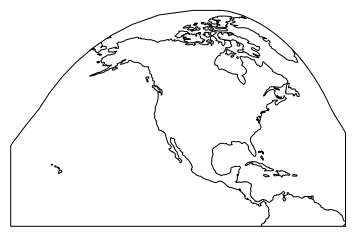

In [86]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
ax.set_extent([-170,-50,0,90])